In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.00      0.00      0.00       338
   happiness       0.43      0.12      0.19      1028
        hate       0.00      0.00      0.00       268
        love       0.59      0.14      0.23       762
     neutral       0.30      0.45      0.36      1740
      relief       0.00      0.00      0.00       352
     sadness       0.29      0.01      0.01      1046
    surprise       0.00      0.00      0.00       425
       worry       0.26      0.77      0.39      1666

    accuracy                           0.29      8000
   macro avg       0.14      0.11      0.09      8000
weighted avg       0.27      0.29      0.21      8000



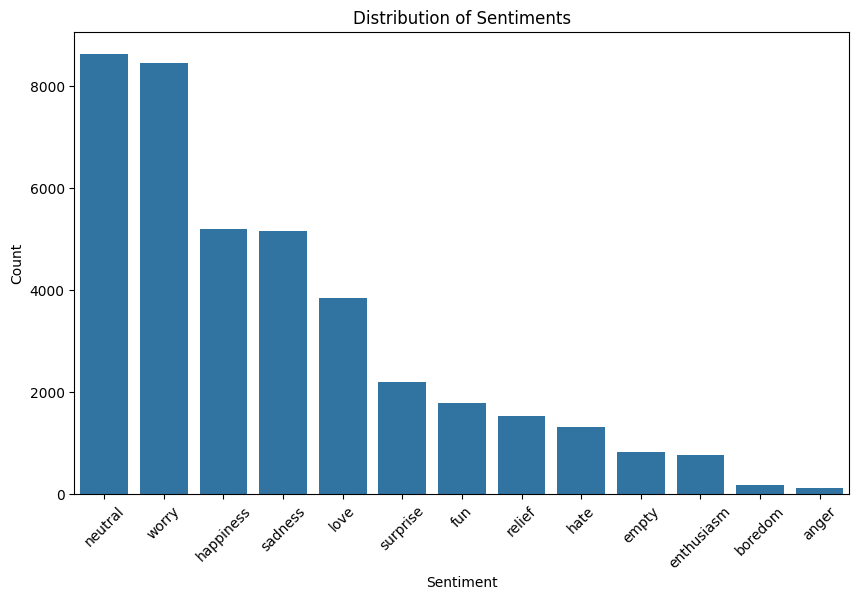

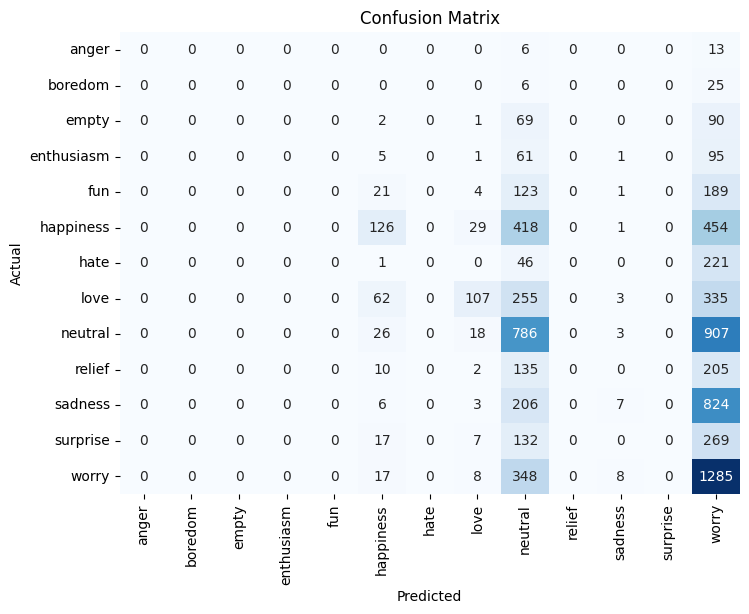

Misclassified Samples:
                                                content  sentiment  \
1     Layin n bed with a headache  ughhhh...waitin o...    sadness   
2                   Funeral ceremony...gloomy friday...    sadness   
4     @dannycastillo We want to trade with someone w...    neutral   
5     Re-pinging @ghostridah14: why didn't you go to...      worry   
8               @charviray Charlene my love. I miss you    sadness   
...                                                 ...        ...   
7995       @PhreshlyPhaded Oh wow  Thanks for the info.  happiness   
7996  @winkphotography great to finally meet you las...      worry   
7997  omg, my right ear is blocked and it's so annoy...      worry   
7998  @dorritos @repressd i get migranes.. so @repre...    sadness   
7999               webcam still wont work  evil stuffs.      worry   

                                        cleaned_content  
1                layin n bed headache ughhhhwaitin call  
2                   

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Step 2: Data Cleaning
df.dropna(inplace=True)  # Drop rows with missing values
df.drop(columns=['tweet_id'], inplace=True)  # Remove unnecessary column

# Step 3: Text Preprocessing
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df['cleaned_content'] = df['content'].apply(clean_text)

# Step 4: Feature Engineering
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_content'])
y = df['sentiment']

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Evaluate Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Additional Analysis
# Distribution of Sentiments
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, order=sentiment_counts.index)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Analyze Misclassifications
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = df.iloc[misclassified_indices]

print("Misclassified Samples:")
print(misclassified_samples[['content', 'sentiment', 'cleaned_content']])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Data preprocessing
encoder = LabelEncoder()
df['label_num'] = encoder.fit_transform(df['sentiment'])

X = df['content']
y = to_categorical(df['label_num'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train_vectorized.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vectorized, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_vectorized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
  import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Data preprocessing
encoder = LabelEncoder()
df['label_num'] = encoder.fit_transform(df['sentiment'])

X = df['content']
y = to_categorical(df['label_num'])

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train_vectorized.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vectorized, y_train, epochs=10, batch_size=32, validation_data=(X_val_vectorized, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_vectorized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_chat_messages(chat_url):
    try:
        # Fetch the chat content
        response = requests.get(chat_url)
        if response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find chat messages based on HTML structure
            chat_messages = soup.find_all(class_='chat-message')  # Adjust class name if needed

            # Extract text from chat messages
            chat_texts = [message.get_text().strip() for message in chat_messages]
            chat_text = '\n'.join(chat_texts)

            print('Chat Text:')
            print(chat_text)
        else:
            print(f"Failed to fetch the chat content. Status code: {response.status_code}")

    except Exception as e:
        print(f'Error during web scraping: {e}')

# Run the function with the chat URL
chat_url = input("Please enter the chat URL: ")
scrape_chat_messages(chat_url)


In [ ]:
import numpy as np
import pandas as pd
import string

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from keras.utils import to_categorical, plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Dropout, LSTM, Embedding
from keras.models import Sequential, Model
from keras.optimizers import Adam

import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Dropout, LSTM, Embedding
from keras.models import Sequential, Model

# Load the dataset
df = pd.read_csv("tweet_emotions.csv")

# Data Preprocessing
df['content'] = df['content'].str.lower()
df['content'] = df['content'].str.translate(str.maketrans('', '', string.punctuation))

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['content'])
sequences = tokenizer.texts_to_sequences(df['content'])
max_sequence_length = max([len(seq) for seq in sequences])
padded_content = pad_sequences(sequences, padding="post", maxlen=max_sequence_length)

label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])
labels = label_encoder.classes_

X, y = padded_content, df['sentiment']
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, train_size=0.2, random_state=1024)
X_labeled_train, X_labeled_test, y_labeled_train, y_labeled_test = train_test_split(X_labeled, y_labeled, test_size=0.1)

y_labeled_train = to_categorical(y_labeled_train)

# LSTM Model
def LSTM_Model():
    input_layer = Input(shape=(max_sequence_length,))
    x = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=200)(input_layer)
    x = LSTM(units=128, return_sequences=True)(x)
    x = Dropout(0.5)(x)
    x = LSTM(units=64)(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(units=len(labels), activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = LSTM_Model()

# Train the LSTM model
history = model.fit(X_labeled_train, y_labeled_train, epochs=10, batch_size=128, validation_split=0.1)

# Use trained model for pseudo-labeling
num_epochs = 7
for epoch in range(num_epochs):
    pseudo_labels = model.predict(X_unlabeled)
    threshold_accuracy = 0.9
    pseudo_indices = np.where(np.argmax(pseudo_labels, axis=1) > threshold_accuracy)[0]
    X_sel = X_unlabeled[pseudo_indices]
    y_sel = pseudo_labels[pseudo_indices]
    X_com = np.vstack([X_labeled_train, X_sel])
    y_com = np.vstack([y_labeled_train, y_sel])
    model.fit(X_com, y_com, batch_size=1024, verbose=1)

# Evaluate the LSTM model
y_preds = model.predict(X_labeled_test)
y_preds = np.argmax(y_preds, axis=1)
test_accuracy = accuracy_score(y_labeled_test, y_preds)
print("LSTM Model Test Accuracy:", test_accuracy)

# Print classification report and confusion matrix
print(classification_report(y_labeled_test, y_preds, zero_division=0))
cm = confusion_matrix(y_labeled_test, y_preds, labels=np.unique(y_labeled_test))
print("Confusion Matrix:\n", cm)

# RandomForestClassifier
y_labeled_train_rf = np.argmax(y_labeled_train, axis=1)
rf = RandomForestClassifier()
rf.fit(X_labeled_train, y_labeled_train_rf)

# Train RandomForestClassifier with pseudo-labeling
for epoch in range(num_epochs):
    y_p = rf.predict_proba(X_unlabeled)
    threshold = 0.95
    indices = np.where(np.argmax(y_p, axis=1) > threshold)[0]
    X_sel = X_unlabeled[indices]
    y_sel = y_p[indices]
    X_com = np.vstack([X_labeled_train, X_sel])
    y_com = np.argmax(np.vstack([y_labeled_train_rf, y_sel]), axis=1)
    rf.fit(X_com, y_com)
    print(f"Iteration {epoch + 1} completed.")

# Evaluate RandomForestClassifier
rf_y = rf.predict(X_labeled_test)
rf_test_acc = accuracy_score(y_labeled_test, rf_y)
print("RandomForestClassifier Test Accuracy:", rf_test_acc)


here on

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('brown')

In [ ]:
from nltk.corpus import brown
brown_words = brown.words()

In [ ]:
review_words=brown.words(categories='reviews')
print(review_words)

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
set(nltk.corpus.stopwords.words('english'))

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

eg_sent=" i know  i was listenin to bad habit earlier and i started freakin at his part =["
stop_words=set(stopwords.words('english'))
word_tokens=word_tokenize(eg_sent)
filtered_sentance=[x for x in word_tokens if x not in stop_words]
print(filtered_sentance)

filter out the emojis using corpus

filter the emojis

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
ps=PorterStemmer()
new_text=" i know  i was listenin to bad habit earlier and i started freakin at his part =["
words=word_tokenize(new_text)
for x in words:
  print(ps.stem(x))

In [ ]:
!pip install nltk
!python -m nltk.downloader wordnet

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("feet"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("freakin"))
print(lemmatizer.lemmatize("listenin"))

In [ ]:
!pip install nltk
import nltk
nltk.download('wordnet')

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
print(lemmatizer.lemmatize("feet"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("freakin"))
print(lemmatizer.lemmatize("listenin"))

In [ ]:
!pip install stopwords
import stopwords
wordlist = ['this', 'is', 'a', 'list', 'of', 'words']

In [ ]:
wordlist=[x for x in wordlist if not x in stop_words]

In [ ]:
!pip install nltk
from nltk import sent_tokenize
text = "This is a sample sentence. This is another sentence."

In [ ]:
tokenized=sent_tokenize(text)

In [ ]:
wordlist=[x for x in wordlist if not x in stop_words]

In [ ]:
!pip install nltk
!pip install stopwords
import nltk
import stopwords
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

for i in tokenized:
  wordlist = nltk.word_tokenize(i)
  wordlist = [x for x in wordlist if x not in stop_words]

In [ ]:
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')
text="i know  i was listenin to bad habit earlier and i started freakin at his part =["
tokenized=sent_tokenize(text)
for i in tokenized:
  wordlist=nltk.word_tokenize(i)
  wordlist=[x for x in wordlist if not x in stop_words]
  tagged=nltk.pos_tag(wordlist)
print(tagged)

In [ ]:
!pip show nltk

In [ ]:
import nltk
print(dir(nltk))
import nltk
tokenized_doc = nltk.word_tokenize(doc)

In [ ]:
!pip install nltk
nltk.download('maxent_ne_chunker')
!pip install nltk
nltk.download('words')

In [ ]:
import nltk
nltk.download('punkt')



In [ ]:
doc = '''i know  i was listenin to bad habit earlier and i started freakin at his part =['''
tokenized_doc = nltk.word_tokenize(doc)
tagged_sentences = nltk.pos_tag(tokenized_doc)
ne_chunked_sents = nltk.ne_chunk(tagged_sentences)
named_entities = []
for tagged_tree in ne_chunked_sents:
    if hasattr(tagged_tree, 'label'):
        entity_name = ''.join(c[0] for c in tagged_tree.leaves())
        entity_type = tagged_tree.label()
        named_entities.append((entity_name, entity_type))
print(named_entities)

remove the numerics. use

In [ ]:
from textblob import TextBlob

# Input text
text = "I hate hate  spending time with my family and friends. It makes me feel happy and content."
#text="ants to hang out with friends SOON"
# Create a TextBlob object
blob = TextBlob(text)

# Get sentiment scores (polarity and subjectivity)
sentiment = blob.sentiment

# Get emotion classification
emotion = blob.sentiment_assessments[0]

# Print results
print("Sentiment:", sentiment)
print("Emotion:", emotion)
